In [1]:
%matplotlib inline


# Thresholding


Thresholding is used to create a binary image from a grayscale image [1]_.

.. [1] https://en.wikipedia.org/wiki/Thresholding_%28image_processing%29

.. seealso::
    A more comprehensive presentation on
    `sphx_glr_auto_examples_xx_applications_plot_thresholding.py`




We illustrate how to apply one of these thresholding algorithms.
Otsu's method [2]_ calculates an "optimal" threshold (marked by a red line in the
histogram below) by maximizing the variance between two classes of pixels,
which are separated by the threshold. Equivalently, this threshold minimizes
the intra-class variance.

.. [2] http://en.wikipedia.org/wiki/Otsu's_method




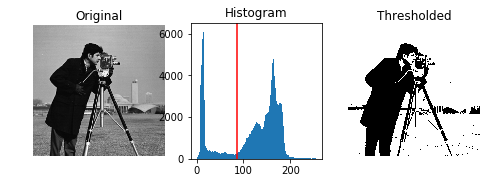

In [2]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu


image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1, adjustable='box-forced')
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0], adjustable='box-forced')

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

If you are not familiar with the details of the different algorithms and the
underlying assumptions, it is often difficult to know which algorithm will give
the best results. Therefore, Scikit-image includes a function to evaluate
thresholding algorithms provided by the library. At a glance, you can select
the best algorithm for you data without a deep understanding of their
mechanisms.




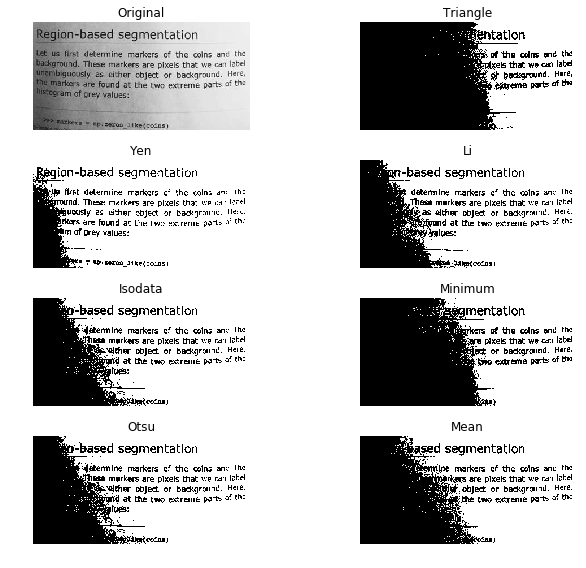

In [3]:
from skimage.filters import try_all_threshold

img = data.page()

# Here, we specify a radius for local thresholding algorithms.
# If it is not specified, only global algorithms are called.
fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()